In [3]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('../')))
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, desc

from shared.schemas import transaction_schema

spark = (
    SparkSession.builder.appName("DataAggregations")    
    .config("spark.sql.parquet.enableVectorizedReader", "true")
    .config("spark.sql.parquet.mergeSchema", "false") # No need as we explicitly specify the schema
    .config("spark.executor.memory", "6g")  # Increase executor memory
    .config("spark.driver.memory", "2g")    # Increase driver memory
    #.config("spark.local.dir", "/mnt/d/spark-temp")  # Change temp directory
    .getOrCreate()
)

transactions_df = spark.read.schema(transaction_schema).parquet("../../data/historical/etl/transactions")
transaction_df = transactions_df.orderBy(desc("block_timestamp"))
ethereum_df = transaction_df.where(col("network_name")=="ethereum").limit(25000)
bitcoin_df = transaction_df.where(col("network_name")=="bitcoin").limit(25000)
transaction_df = ethereum_df.unionByName(bitcoin_df)

Py4JJavaError: An error occurred while calling o75.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 1 in stage 5.0 failed 1 times, most recent failure: Lost task 1.0 in stage 5.0 (TID 12) (192.168.0.164 executor driver): org.apache.spark.SparkException: Parquet column cannot be converted in file file:///c:/Users/wikar/Desktop/PBL/repo/BDP-Blockchain-Data-Processing/data/historical/training/eth/part-00000-ce266cee-c1ac-4b67-95cf-4429aaaa3392-c000.zstd.parquet. Column: [transaction_hash], Expected: string, Found: INT64.
	at org.apache.spark.sql.errors.QueryExecutionErrors$.unsupportedSchemaColumnConvertError(QueryExecutionErrors.scala:855)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.nextIterator(FileScanRDD.scala:287)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.hasNext(FileScanRDD.scala:129)
	at org.apache.spark.sql.execution.FileSourceScanExec$$anon$1.hasNext(DataSourceScanExec.scala:593)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.columnartorow_nextBatch_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:388)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:893)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:893)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	at java.lang.Thread.run(Unknown Source)
Caused by: org.apache.spark.sql.execution.datasources.SchemaColumnConvertNotSupportedException: column: [transaction_hash], physicalType: INT64, logicalType: string
	at org.apache.spark.sql.execution.datasources.parquet.ParquetVectorUpdaterFactory.constructConvertNotSupportedException(ParquetVectorUpdaterFactory.java:1136)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetVectorUpdaterFactory.getUpdater(ParquetVectorUpdaterFactory.java:199)
	at org.apache.spark.sql.execution.datasources.parquet.VectorizedColumnReader.readBatch(VectorizedColumnReader.java:175)
	at org.apache.spark.sql.execution.datasources.parquet.VectorizedParquetRecordReader.nextBatch(VectorizedParquetRecordReader.java:342)
	at org.apache.spark.sql.execution.datasources.parquet.VectorizedParquetRecordReader.nextKeyValue(VectorizedParquetRecordReader.java:233)
	at org.apache.spark.sql.execution.datasources.RecordReaderIterator.hasNext(RecordReaderIterator.scala:39)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.hasNext(FileScanRDD.scala:129)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.nextIterator(FileScanRDD.scala:283)
	... 23 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2393)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2414)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2433)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:530)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:483)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:61)
	at org.apache.spark.sql.Dataset.collectFromPlan(Dataset.scala:4333)
	at org.apache.spark.sql.Dataset.$anonfun$head$1(Dataset.scala:3316)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:4323)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:546)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:4321)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:4321)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:3316)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:3539)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:280)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:315)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Unknown Source)
Caused by: org.apache.spark.SparkException: Parquet column cannot be converted in file file:///c:/Users/wikar/Desktop/PBL/repo/BDP-Blockchain-Data-Processing/data/historical/training/eth/part-00000-ce266cee-c1ac-4b67-95cf-4429aaaa3392-c000.zstd.parquet. Column: [transaction_hash], Expected: string, Found: INT64.
	at org.apache.spark.sql.errors.QueryExecutionErrors$.unsupportedSchemaColumnConvertError(QueryExecutionErrors.scala:855)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.nextIterator(FileScanRDD.scala:287)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.hasNext(FileScanRDD.scala:129)
	at org.apache.spark.sql.execution.FileSourceScanExec$$anon$1.hasNext(DataSourceScanExec.scala:593)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.columnartorow_nextBatch_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:388)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:893)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:893)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	... 1 more
Caused by: org.apache.spark.sql.execution.datasources.SchemaColumnConvertNotSupportedException: column: [transaction_hash], physicalType: INT64, logicalType: string
	at org.apache.spark.sql.execution.datasources.parquet.ParquetVectorUpdaterFactory.constructConvertNotSupportedException(ParquetVectorUpdaterFactory.java:1136)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetVectorUpdaterFactory.getUpdater(ParquetVectorUpdaterFactory.java:199)
	at org.apache.spark.sql.execution.datasources.parquet.VectorizedColumnReader.readBatch(VectorizedColumnReader.java:175)
	at org.apache.spark.sql.execution.datasources.parquet.VectorizedParquetRecordReader.nextBatch(VectorizedParquetRecordReader.java:342)
	at org.apache.spark.sql.execution.datasources.parquet.VectorizedParquetRecordReader.nextKeyValue(VectorizedParquetRecordReader.java:233)
	at org.apache.spark.sql.execution.datasources.RecordReaderIterator.hasNext(RecordReaderIterator.scala:39)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.hasNext(FileScanRDD.scala:129)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.nextIterator(FileScanRDD.scala:283)
	... 23 more


In [27]:
pandas_df = transaction_df.toPandas()

In [34]:
print(pandas_df.iloc[0])

transaction_id                          cefc0909-0888-40c3-b55c-a5edd4e74653
block_timestamp                                          2024-12-03 00:59:59
block_number                                                        21318259
transaction_hash           0x1f00251ee926a01057e7b2c3005aefbbbaf5095ba297...
transaction_index                                                        144
fee                                                                 0.004683
sender_address                    0x21a31ee1afc51d94c2efccaa2092ad1028285549
receiver_address                  0xd7370f2960177218cd1d31793e6be50fe62ad946
total_transferred_value                                               0.7785
total_input_value                                                   0.783183
sent_value                                                          0.783183
received_value                                                        0.7785
network_name                                                        ethereum

transaction_hash           0x1f00251ee926a01057e7b2c3005aefbbbaf5095ba297...
fee                                                                 0.004683
sender_address                    0x21a31ee1afc51d94c2efccaa2092ad1028285549
receiver_address                  0xd7370f2960177218cd1d31793e6be50fe62ad946
total_transferred_value                                               0.7785
total_input_value                                                   0.783183
sent_value                                                          0.783183
received_value                                                        0.7785
network_name                                                        ethereum
timestamp_numeric                                                 1733187599
Name: 0, dtype: object


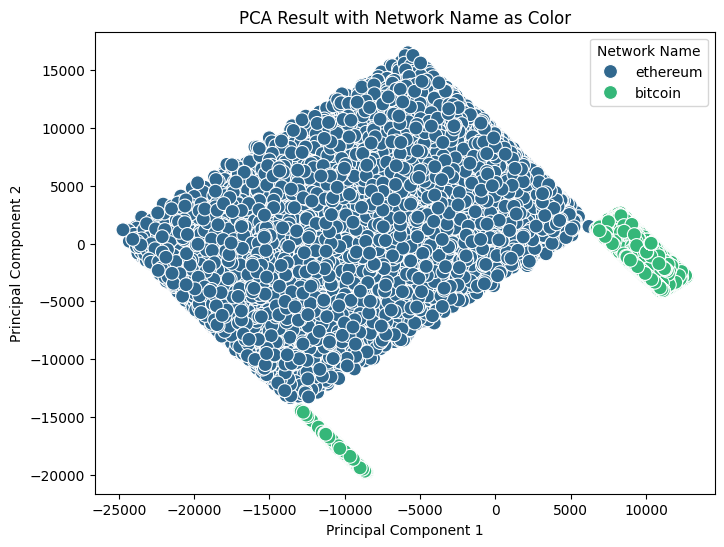

In [54]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

numerical_df = pandas_df.copy()
numerical_df['block_timestamp'] = pd.to_datetime(numerical_df['block_timestamp'])
numerical_df['timestamp_numeric'] = numerical_df['block_timestamp'].astype('int64') // 10**9
numerical_df.drop('block_timestamp', axis=1, inplace=True)

numerical_df.drop('block_number', axis=1, inplace=True)
numerical_df.drop('transaction_id', axis=1, inplace=True)
numerical_df.drop('transaction_index', axis=1, inplace=True)
print(numerical_df.iloc[0])
label_encoder = LabelEncoder()
for col in ['transaction_hash', 'sender_address', 'receiver_address']:
    numerical_df[col] = label_encoder.fit_transform(numerical_df[col])
   
network_name_labels = numerical_df['network_name']
numerical_df.drop('network_name', axis=1, inplace=True)

pca = PCA(n_components=2)  # Adjust n_components as needed
principal_components = pca.fit_transform(numerical_df)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['network_name'] = network_name_labels

# Plot the PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='network_name', palette='viridis', s=100)
plt.title('PCA Result with Network Name as Color')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Network Name')
plt.show()